# AirBnB listings in major US cities

Zirong Wu, Ram Das, Bindu Vasireddy

# Problem framing and Goal

## Introduction 
This data is from Deloitte Machine Learning Competition.

The aim of this competition was to predict the price of AirBnB listings in major U.S. cities.

In this case, we would like to ** predict the price of Airbnb listings in New York City **.

Pleace click [Link](https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml) to assess the data source on Kaggle.

Reference kernel [How I ranked 5th/+160 in Deloitte's ML Competition](https://www.kaggle.com/rudymizrahi/how-i-ranked-5th-160-in-deloitte-s-ml-competition).

In [2]:
# packages. At this point we are not importing the sklearn.
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import kaggle
from zipfile import ZipFile
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use('ggplot')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

## Kaggle API installation

To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. This will trigger the download of kaggle.json, a file containing your API credentials. Place this file in the location ~/.kaggle/kaggle.json (on Windows in the location C:\Users\<Windows-username>\.kaggle\kaggle.json).

Run the following command to access the Kaggle API using the command line:

`pip install kaggle`

For your security, ensure that other users of your computer do not have read access to your credentials. On Unix-based systems you can do this with the following command:

`chmod 600 ~/.kaggle/kaggle.json`

The API [source](https://github.com/Kaggle/kaggle-api).

# Get the data

# download the data from Kaggle


In [3]:
pwd

'/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3'

In [ ]:
# !kaggle datasets download -d rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml --wp

In [4]:
file = 'airbnb-listings-in-major-us-cities-deloitte-ml.zip'

In [5]:
# Open the downloaded data and read the zip file and read the data file.
with ZipFile(file) as z:
    with z.open('train.csv') as f:
        ogdf = pd.read_csv(f)

In [6]:
# set the copy of original data for wrangling
df = ogdf.loc[ogdf.city == 'NYC'].copy()

# Data Preprocessing

In [7]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
10,5578513,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,...,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0
18,17589436,4.882802,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,...,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32349 entries, 0 to 74109
Data columns (total 29 columns):
id                        32349 non-null int64
log_price                 32349 non-null float64
property_type             32349 non-null object
room_type                 32349 non-null object
amenities                 32349 non-null object
accommodates              32349 non-null int64
bathrooms                 32250 non-null float64
bed_type                  32349 non-null object
cancellation_policy       32349 non-null object
cleaning_fee              32349 non-null bool
city                      32349 non-null object
description               32349 non-null object
first_review              25491 non-null object
host_has_profile_pic      32173 non-null object
host_identity_verified    32173 non-null object
host_response_rate        22389 non-null object
host_since                32173 non-null object
instant_bookable          32349 non-null object
last_review               255

In [9]:
df.cancellation_policy.value_counts()

strict             14475
flexible           10013
moderate            7851
super_strict_30        9
super_strict_60        1
Name: cancellation_policy, dtype: int64

In [10]:
df.room_type.value_counts()

Entire home/apt    16243
Private room       15299
Shared room          807
Name: room_type, dtype: int64

In [11]:
df.host_has_profile_pic.value_counts()

t    32076
f       97
Name: host_has_profile_pic, dtype: int64

In [12]:
df.host_identity_verified.value_counts()

t    20507
f    11666
Name: host_identity_verified, dtype: int64

In [13]:
df.host_response_rate.value_counts()

100%    17241
90%      1092
80%       577
0%        392
50%       302
70%       249
67%       202
75%       187
60%       184
89%       139
88%       127
83%       125
86%       118
97%       110
92%       106
95%       105
93%       103
94%       100
33%        72
96%        71
91%        69
40%        69
98%        62
99%        55
78%        41
25%        39
71%        39
63%        34
82%        32
57%        31
        ...  
44%        10
76%         9
17%         9
64%         9
69%         8
46%         7
38%         7
10%         6
58%         6
53%         4
68%         4
22%         3
65%         3
26%         3
66%         2
36%         2
54%         2
14%         2
35%         2
47%         2
59%         2
61%         1
21%         1
72%         1
27%         1
52%         1
62%         1
15%         1
41%         1
6%          1
Name: host_response_rate, Length: 74, dtype: int64

In [14]:
df.first_review.value_counts()

2017-09-04    156
2017-01-01    145
2017-01-02    129
2016-01-02    123
2016-01-03    106
2016-01-05     86
2017-07-31     85
2016-09-05     84
2017-09-10     82
2017-09-03     81
2015-09-21     80
2017-07-30     79
2017-09-17     77
2017-08-13     72
2017-08-20     71
2017-04-16     71
2017-06-25     68
2015-09-07     68
2017-07-23     67
2017-07-16     67
2016-01-01     67
2017-08-06     66
2017-08-07     65
2017-05-21     65
2017-07-09     62
2017-07-01     61
2017-08-27     60
2017-09-05     57
2017-01-03     57
2016-11-27     55
             ... 
2010-11-15      1
2015-01-17      1
2012-12-04      1
2011-02-27      1
2013-01-25      1
2010-07-16      1
2010-01-14      1
2013-02-16      1
2011-10-05      1
2010-10-18      1
2016-01-22      1
2011-06-11      1
2011-09-24      1
2009-12-13      1
2011-07-16      1
2011-04-22      1
2012-12-14      1
2011-09-02      1
2012-06-23      1
2012-11-16      1
2011-06-21      1
2011-02-01      1
2011-07-19      1
2012-07-03      1
2014-03-16

In [15]:
df.last_review.value_counts()

2017-09-24    1032
2017-09-17     929
2017-09-18     709
2017-09-25     597
2017-10-01     542
2017-09-16     525
2017-09-04     509
2017-09-30     456
2017-09-10     447
2017-09-28     446
2017-09-23     443
2017-09-15     441
2017-09-29     429
2017-09-22     417
2017-09-26     403
2017-09-27     401
2017-09-19     368
2017-09-14     353
2017-09-20     351
2017-09-21     334
2017-09-11     330
2017-09-13     321
2017-09-12     288
2017-09-03     260
2017-09-05     220
2017-09-09     214
2017-08-27     203
2017-01-01     193
2017-09-08     184
2017-08-31     178
              ... 
2015-06-07       1
2015-02-16       1
2013-12-02       1
2014-10-16       1
2013-12-04       1
2015-05-26       1
2014-05-13       1
2014-01-11       1
2015-10-23       1
2015-04-13       1
2014-06-06       1
2013-12-14       1
2015-03-30       1
2014-05-08       1
2014-08-28       1
2011-05-12       1
2015-01-21       1
2015-05-10       1
2010-12-31       1
2014-10-02       1
2016-02-10       1
2014-04-25  

In [16]:
df.instant_bookable.value_counts()

f    24425
t     7924
Name: instant_bookable, dtype: int64

In [17]:
df.neighbourhood.value_counts()

Williamsburg           2862
Bedford-Stuyvesant     2166
Bushwick               1601
Upper West Side        1396
Harlem                 1374
Hell's Kitchen         1299
Upper East Side        1206
Crown Heights          1076
Astoria                 898
Lower East Side         833
East Village            814
East Harlem             793
Chelsea                 726
Greenpoint              725
Washington Heights      721
Hamilton Heights        628
Alphabet City           619
Clinton Hill            618
West Village            606
Park Slope              601
Flatbush                551
Midtown East            441
Lefferts Garden         341
Kips Bay                334
Financial District      323
Midtown                 319
Chinatown               295
Greenwich Village       293
Jamaica                 279
Fort Greene             272
                       ... 
West Farms                4
Grymes Hill               4
Marine Park               3
Port Richmond             3
Co-op City          

In [18]:
df.zipcode.value_counts()

11211.0                     1368
11221                       1188
10019                        775
11222                        738
10002                        737
10009.0                      722
10025                        713
11237                        647
11215                        632
10027                        628
10036                        618
10031                        611
11216                        610
11206                        589
10014                        577
10012                        548
10029.0                      534
10016                        523
10011.0                      503
11238.0                      498
11249.0                      482
10003.0                      474
11233                        428
11206.0                      426
11226                        405
11217                        402
11238                        386
10032                        381
10023                        375
10024                        372
          

In [19]:
df.bedrooms.value_counts()

1.0     23568
2.0      4104
0.0      2935
3.0      1256
4.0       325
5.0        77
6.0        17
7.0        10
10.0        4
8.0         4
9.0         2
Name: bedrooms, dtype: int64

In [20]:
df.beds.value_counts()

1.0     21555
2.0      6707
3.0      2309
4.0       960
5.0       399
6.0       189
7.0        62
8.0        37
10.0       21
9.0        17
11.0        7
12.0        7
13.0        5
16.0        4
0.0         2
15.0        2
18.0        1
Name: beds, dtype: int64

In [21]:
df.description.head()

0     Beautiful, sunlit brownstone 1-bedroom in the ...
1     Enjoy travelling during your stay in Manhattan...
2     The Oasis comes complete with a full backyard ...
10    This is a bright bedroom in an historic buildi...
18    I am renting a very spacious, unique, bright L...
Name: description, dtype: object

### Data Quality Issues

- reset the index
- drop the city column, thumbnail_url, description, name
- first review, last review should be datetime
- host_has_profile_pic, host_identity_verified, instant_bookable to boolean with onehotcode
- host_response_rate extract the value and transform to decimal percentage
- format the zipcode.(Only get the first five number of zipcode)

### Cleansing

Drop the id

In [22]:
df.drop(['id'], axis = 1, inplace = True)

** Test **

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32349 entries, 0 to 74109
Data columns (total 28 columns):
log_price                 32349 non-null float64
property_type             32349 non-null object
room_type                 32349 non-null object
amenities                 32349 non-null object
accommodates              32349 non-null int64
bathrooms                 32250 non-null float64
bed_type                  32349 non-null object
cancellation_policy       32349 non-null object
cleaning_fee              32349 non-null bool
city                      32349 non-null object
description               32349 non-null object
first_review              25491 non-null object
host_has_profile_pic      32173 non-null object
host_identity_verified    32173 non-null object
host_response_rate        22389 non-null object
host_since                32173 non-null object
instant_bookable          32349 non-null object
last_review               25517 non-null object
latitude                  32

reset the index

In [24]:
df.reset_index(drop = True, inplace = True)

** Test **

In [25]:
df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,4.605170,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,...,40.723883,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0
4,4.882802,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,NYC,...,40.719086,-73.990285,"Amazing LES apt - cool, bright...",Lower East Side,26,86.0,NaN,10002,1.0,2.0


drop the city column, thumbnail_url, description, name

In [26]:
droplist = ['city', 'thumbnail_url', 'description', 'name']

df.drop(droplist, axis = 1, inplace = True)

** Test **

In [27]:
assert droplist not in df.columns.tolist()

first review, last review should be datetime

In [28]:
df.first_review = pd.to_datetime(df.first_review, errors = 'coerce')

In [29]:
df.last_review = pd.to_datetime(df.last_review, errors = 'coerce')

** Test **

In [30]:
df.first_review.dtypes

dtype('<M8[ns]')

In [31]:
df.last_review.dtype

dtype('<M8[ns]')

host_has_profile_pic, host_identity_verified, instant_bookable to 1/0 with LabelBinarizer

In [32]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

def masktran(data, seriesname):
    # mask the series without null value and binarize the label
    for i in seriesname:
        print('Total null value in {0} is {1}'.format(i, data[i].isnull().sum()))
        mask = ~data[i].isnull()
        print('mask:', mask[0:5])
        data[i][mask] = lb.fit_transform(data[i][mask])
        print('Successful processed', data[i].head())
    return data

In [33]:
lbls = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

In [34]:
df = masktran(df, lbls)

Total null value in host_has_profile_pic is 176
mask: 0    True
1    True
2    True
3    True
4    True
Name: host_has_profile_pic, dtype: bool
Successful processed 0    1
1    1
2    1
3    1
4    1
Name: host_has_profile_pic, dtype: object
Total null value in host_identity_verified is 176
mask: 0    True
1    True
2    True
3    True
4    True
Name: host_identity_verified, dtype: bool
Successful processed 0    1
1    0
2    1
3    1
4    1
Name: host_identity_verified, dtype: object
Total null value in instant_bookable is 0
mask: 0    True
1    True
2    True
3    True
4    True
Name: instant_bookable, dtype: bool
Successful processed 0    0
1    1
2    1
3    0
4    0
Name: instant_bookable, dtype: object


In [35]:
# fill the missing value with 0
for i in lbls:
    df[i].fillna(0, inplace = True)

In [36]:
df[lbls] = df[lbls].astype(int, inplace = True)

** Test **

In [37]:
df[lbls].head()

,host_has_profile_pic,host_identity_verified,instant_bookable
0,1,1,0
1,1,0,1
2,1,1,1
3,1,1,0
4,1,1,0


host_response_rate extract the value and transform to decimal percentage

In [38]:
df.host_response_rate = df.host_response_rate.str.extract('(\d*)')

In [39]:
df.host_response_rate = df.host_response_rate.astype(float)

** Test **

In [40]:
df.host_response_rate.dtype

dtype('float64')

In [41]:
df.host_response_rate.value_counts()

100.0    17241
90.0      1092
80.0       577
0.0        392
50.0       302
70.0       249
67.0       202
75.0       187
60.0       184
89.0       139
88.0       127
83.0       125
86.0       118
97.0       110
92.0       106
95.0       105
93.0       103
94.0       100
33.0        72
96.0        71
91.0        69
40.0        69
98.0        62
99.0        55
78.0        41
71.0        39
25.0        39
63.0        34
82.0        32
57.0        31
         ...  
44.0        10
76.0         9
64.0         9
17.0         9
69.0         8
46.0         7
38.0         7
58.0         6
10.0         6
68.0         4
53.0         4
65.0         3
26.0         3
22.0         3
66.0         2
35.0         2
54.0         2
36.0         2
14.0         2
47.0         2
59.0         2
6.0          1
61.0         1
27.0         1
62.0         1
21.0         1
41.0         1
72.0         1
15.0         1
52.0         1
Name: host_response_rate, Length: 74, dtype: int64

format the zipcode.(Only get the first five number of zipcode)

In [42]:
df.zipcode = df.zipcode.str.extract('(\d+)\.?\-?').str.pad(width= 5, fillchar = '0')

** Test **

In [43]:
df.zipcode.value_counts()

11211    1618
11221    1198
11206    1015
10002     960
11216     931
11238     884
10009     870
10003     780
10019     776
11222     770
11237     729
10025     714
10011     639
10027     635
11215     633
10036     620
10031     611
10014     592
10012     549
10029     538
11249     529
10016     524
11233     510
11205     504
11225     481
11226     480
11217     408
10032     381
10023     375
10024     372
         ... 
10308       5
10307       5
11357       5
10129       4
11427       3
11362       3
10470       3
11004       2
10270       2
10550       2
10281       2
11363       2
11366       2
10118       1
10162       1
00001       1
11001       1
10119       1
11239       1
10704       1
07306       1
10106       1
10309       1
11580       1
10279       1
10048       1
99135       1
11509       1
07302       1
10000       1
Name: zipcode, Length: 196, dtype: int64

In [44]:
df.zipcode.dtype

dtype('O')

### Correlation map

In [45]:
# select different data type
num_col = df.select_dtypes(include = np.number)

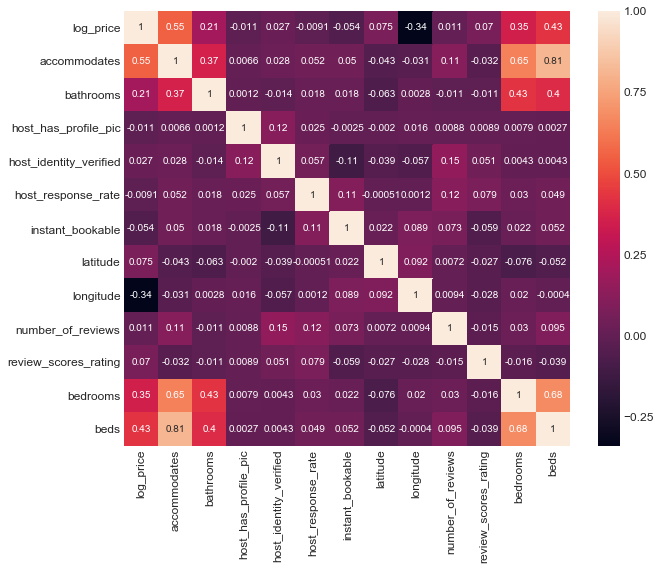

In [46]:
# create the correlation
corr = num_col.corr()

# create the map according to corr
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True);

- accommdates is high correlated(0.81) with beds and is high correlated (0.65) with bedrooms.
- beds is also high correlated(0.68) with bedrooms.

### Data Wrangling

- Derive difference duration according to first review, last review, host since
- get dummies from property_type, room_type, bed_type, cancellation_policy
- drop neighbourhood, zipcode
- get dummies from amenities.
- derive distance from latitude and longitude to NYC center.


#### Derive difference duration according to first review, last review, host since

Data Collected date (2017-10-02) Gather from Kaggle

In [47]:
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)
df.host_since = pd.to_datetime(df.host_since)

In [48]:
# according the the intro, the NYC data was collected as date of 2017-10-02
data_as_of_t = pd.to_datetime('2017-10-02')
#data_as_of_t = datetime.datetime.strptime('2017-10-02', '%Y-%m-%d').date()

In [49]:
# generate the diff between first review, last review, hostsince and data as of today
df['diffFirst'] = df.first_review.apply(lambda x: (data_as_of_t - x) / np.timedelta64(1, 'D'))
df['diffLast'] = df.last_review.apply(lambda x: (data_as_of_t - x) / np.timedelta64(1, 'D'))
df['diffhostsince'] = df.host_since.apply(lambda x: (data_as_of_t - x) / np.timedelta64(1, 'D'))

In [50]:
df.drop(['first_review', 'host_since', 'last_review'], axis = 1, inplace = True)

** Test **

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32349 entries, 0 to 32348
Data columns (total 24 columns):
log_price                 32349 non-null float64
property_type             32349 non-null object
room_type                 32349 non-null object
amenities                 32349 non-null object
accommodates              32349 non-null int64
bathrooms                 32250 non-null float64
bed_type                  32349 non-null object
cancellation_policy       32349 non-null object
cleaning_fee              32349 non-null bool
host_has_profile_pic      32349 non-null int64
host_identity_verified    32349 non-null int64
host_response_rate        22389 non-null float64
instant_bookable          32349 non-null int64
latitude                  32349 non-null float64
longitude                 32349 non-null float64
neighbourhood             32341 non-null object
number_of_reviews         32349 non-null int64
review_scores_rating      25028 non-null float64
zipcode                   31

get dummies from property_type, room_type, bed_type, cancellation_policy

In [52]:
catlist = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
for i in catlist:
    try:
        df = pd.concat([df, pd.get_dummies(df[i])], axis = 1)
    except:
        print('{0} is not able to concat'.format(i))

In [53]:
df.drop(catlist, axis = 1, inplace = True)

** Test **

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32349 entries, 0 to 32348
Data columns (total 58 columns):
log_price                 32349 non-null float64
amenities                 32349 non-null object
accommodates              32349 non-null int64
bathrooms                 32250 non-null float64
cleaning_fee              32349 non-null bool
host_has_profile_pic      32349 non-null int64
host_identity_verified    32349 non-null int64
host_response_rate        22389 non-null float64
instant_bookable          32349 non-null int64
latitude                  32349 non-null float64
longitude                 32349 non-null float64
neighbourhood             32341 non-null object
number_of_reviews         32349 non-null int64
review_scores_rating      25028 non-null float64
zipcode                   31903 non-null object
bedrooms                  32302 non-null float64
beds                      32284 non-null float64
diffFirst                 25491 non-null float64
diffLast                 

drop neighbourhood, zipcode

In [55]:
df.drop(['neighbourhood', 'zipcode'], axis = 1, inplace = True)

#### Derive distance from latitude and longtitude to NYC center (Lat: 40.730610, Long: -73.935242). 

Method idea: sqrt(abs(square(La(loc) - Lat)) + abs(square(long(loc) - long)))

In [56]:
# function for calculate the distance
def dist(lon1, lat1, lon2, lat2):
    '''
    this function is to calculate the distance according to the longtitude and latitude.
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    all awg length should be the same.
    reference: 
    https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas/29546836#29546836'''
    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [57]:
# create derived variable name disttocitycenter
df['disttocitycenter'] = df.apply(lambda row: dist(row.longitude, row.latitude, -73.935242, 40.730610), axis = 1) 

In [58]:
df.drop(['longitude', 'latitude'], inplace = True, axis = 1)

** Test **

In [59]:
df.disttocitycenter.value_counts()

5.965410     1
8.554757     1
10.455999    1
5.031268     1
4.871166     1
4.482046     1
5.340756     1
3.965940     1
1.645421     1
5.447067     1
1.375316     1
3.018780     1
7.221807     1
4.383166     1
3.977874     1
4.613216     1
8.748032     1
4.653985     1
3.879423     1
9.566349     1
6.421094     1
1.579311     1
1.966332     1
5.875628     1
8.320387     1
7.703987     1
7.564714     1
2.141786     1
6.665159     1
4.567395     1
            ..
7.108544     1
5.016748     1
4.295933     1
7.209475     1
7.406139     1
3.609978     1
4.453925     1
5.088603     1
7.054480     1
4.214190     1
4.522745     1
2.608093     1
3.974833     1
4.876562     1
6.201411     1
2.993882     1
5.774157     1
5.632989     1
19.639317    1
7.428621     1
4.261519     1
16.360370    1
3.429587     1
11.018893    1
5.744437     1
10.832490    1
17.572863    1
8.608565     1
19.672058    1
6.809357     1
Name: disttocitycenter, Length: 32349, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32349 entries, 0 to 32348
Data columns (total 55 columns):
log_price                 32349 non-null float64
amenities                 32349 non-null object
accommodates              32349 non-null int64
bathrooms                 32250 non-null float64
cleaning_fee              32349 non-null bool
host_has_profile_pic      32349 non-null int64
host_identity_verified    32349 non-null int64
host_response_rate        22389 non-null float64
instant_bookable          32349 non-null int64
number_of_reviews         32349 non-null int64
review_scores_rating      25028 non-null float64
bedrooms                  32302 non-null float64
beds                      32284 non-null float64
diffFirst                 25491 non-null float64
diffLast                  25517 non-null float64
diffhostsince             32173 non-null float64
Apartment                 32349 non-null uint8
Bed & Breakfast           32349 non-null uint8
Boat                      3

#### get dummies of the amenities value

In [61]:
# replace all different symbols to comma
df.amenities = df.amenities.map(lambda am: '|'.join([i.replace('}', '').replace('{', '').replace('"', '') for i in am.split(',')]))

In [62]:
# concat the value as list
np.concatenate(df.amenities.map(lambda am: am.split('|')).values)

array(['Wireless Internet', 'Air conditioning', 'Kitchen', ...,
       'Hair dryer', 'Iron', 'Laptop friendly workspace'], dtype='<U42')

In [63]:
# filter the unique value from amentities
np.unique(np.concatenate(df.amenities.map(lambda am: am.split('|'))))

array(['', ' smooth pathway to front door', '24-hour check-in',
       'Accessible-height bed', 'Accessible-height toilet',
       'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath',
       'Baby monitor', 'Babysitter recommendations', 'Bathtub',
       'Bathtub with shower chair', 'Beach essentials', 'Beachfront',
       'Bed linens', 'Breakfast', 'Buzzer/wireless intercom', 'Cable TV',
       'Carbon monoxide detector', 'Cat(s)', 'Changing table',
       'Children’s books and toys', 'Children’s dinnerware',
       'Cleaning before checkout', 'Coffee maker', 'Cooking basics',
       'Crib', 'Disabled parking spot', 'Dishes and silverware',
       'Dishwasher', 'Dog(s)', 'Doorman', 'Dryer', 'EV charger',
       'Elevator', 'Essentials', 'Ethernet connection',
       'Extra pillows and blankets', 'Family/kid friendly',
       'Fire extinguisher', 'Fireplace guards', 'Firm mattress',
       'First aid kit', 'Fixed grab bars for shower & toilet', 'Flat',
       'Free parking on 

In [64]:
# store the amentites valus to amen
amen = np.unique(np.concatenate(df.amenities.map(lambda am: am.split('|'))))[1:]

# create array for value of amentites in each record
amen_arr = np.array([df.amenities.map(lambda am: i in am) for i in amen])

In [65]:
amen_arr.shape

(116, 32349)

In [66]:
# concat amen with df
df_prepared = pd.concat([df, pd.DataFrame(amen_arr.T, columns = amen)], axis = 1)

In [67]:
df_prepared.drop(['amenities'], axis = 1, inplace = True)

In [68]:
df_prepared.rename(columns = {' smooth pathway to front door': 'smooth pathway to front door'}, inplace = True)

In [69]:
df_prepared.info(max_cols = 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32349 entries, 0 to 32348
Data columns (total 170 columns):
log_price                                     32349 non-null float64
accommodates                                  32349 non-null int64
bathrooms                                     32250 non-null float64
cleaning_fee                                  32349 non-null bool
host_has_profile_pic                          32349 non-null int64
host_identity_verified                        32349 non-null int64
host_response_rate                            22389 non-null float64
instant_bookable                              32349 non-null int64
number_of_reviews                             32349 non-null int64
review_scores_rating                          25028 non-null float64
bedrooms                                      32302 non-null float64
beds                                          32284 non-null float64
diffFirst                                     25491 non-null float64
diffLa

### Missing values and outliers detection

In [70]:
nullcol = []
for i in df_prepared.columns[df_prepared.isnull().any()]:
    nullcol.append(i)
    print('Column {0} has missing value'.format(i))

Column bathrooms has missing value
Column host_response_rate has missing value
Column review_scores_rating has missing value
Column bedrooms has missing value
Column beds has missing value
Column diffFirst has missing value
Column diffLast has missing value
Column diffhostsince has missing value


In [71]:
nullcol

['bathrooms',
 'host_response_rate',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'diffFirst',
 'diffLast',
 'diffhostsince']

### Two ways for missing values

- Impute with strategy

#### Imputation for missing values

In [74]:
df_prepared_imp = df_prepared.copy()

In [75]:
df_prepared_imp.shape

(32349, 170)

In [76]:
from sklearn.preprocessing import Imputer

# impute all missing with median
imp = Imputer(strategy = 'median')

# impute the data
df_prepared_imp = imp.fit_transform(df_prepared_imp)

In [77]:
df_prepared_imp = pd.DataFrame(df_prepared_imp, columns = df_prepared.columns.tolist())

In [78]:
df_prepared_imp.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower & toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,5.010635,3.0,1.0,1.0,1.0,1.0,100.0,0.0,2.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.129899,7.0,1.0,1.0,1.0,0.0,100.0,1.0,6.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,4.976734,5.0,1.0,1.0,1.0,1.0,100.0,1.0,10.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4.605170,2.0,1.0,1.0,1.0,1.0,100.0,0.0,82.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4.882802,2.0,1.0,1.0,1.0,1.0,71.0,0.0,26.0,86.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Statistical Summary

In [161]:
# statistical summary
df_prepared_imp.describe()

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower & toilet,Wide doorway,Wide entryway,Wide hallway clearance,Window guards,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
count,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,...,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000,32349.000000
mean,4.719340,2.818201,1.130375,0.707564,0.991561,0.633930,95.516739,0.244953,18.121209,94.070852,...,0.060466,0.009181,0.002689,0.012365,0.006770,0.010789,0.016415,0.967696,0.286098,0.349501
std,0.661567,1.850809,0.398944,0.454888,0.091478,0.481736,14.816722,0.430066,32.852804,7.288181,...,0.238351,0.095379,0.051791,0.110511,0.082002,0.103308,0.127066,0.176809,0.451943,0.476820
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.248495,2.000000,1.000000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,93.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.653960,2.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,5.000000,96.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5.164786,4.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,20.000000,98.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,7.600402,16.000000,8.000000,1.000000,1.000000,1.000000,100.000000,1.000000,474.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
corr = df_prepared_imp[['accommodates', 'beds', 'bedrooms']].corr()

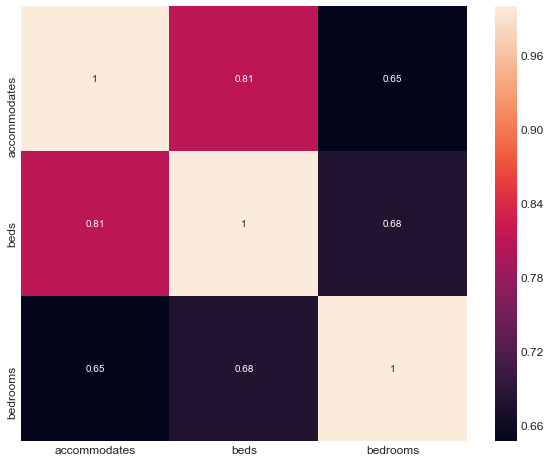

In [81]:
# correlation map of the three attributes
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True);

Accordingly, we would like to drop beds, and bedrooms.

In [82]:
df_prepared_imp.drop(['beds', 'bedrooms'], axis = 1, inplace = True)

# Explore the data

In general, to discuss about the price of airbnb rental, we will consider about the location, the space, number of bathrooms, ratings, accommodates, and the length of host. Therefore, we will explore the relationship among all of them.

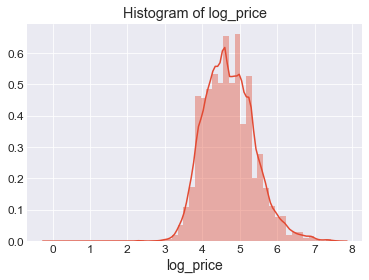

In [83]:
#Distribution Plot for log_price (dependent variable)
sns.distplot(df_prepared_imp.log_price, norm_hist = True)
plt.title('Histogram of log_price');

The distribution of log price is roughly normal distributied.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114686198>,
      dtype=object)

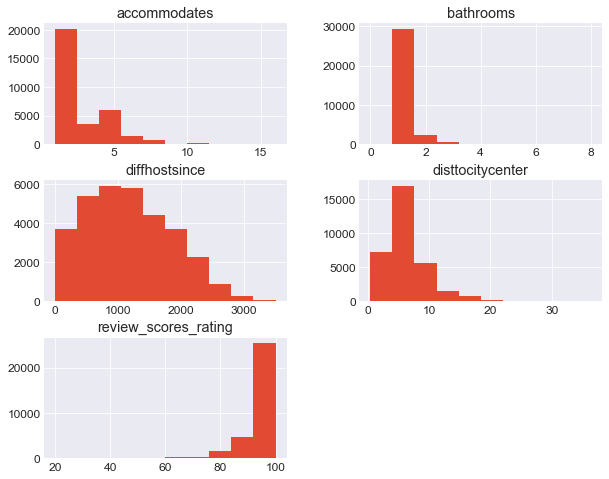

In [160]:
#distribution of host_response_rate
df_prepared_imp[['accommodates', 'bathrooms', 'diffhostsince', 'disttocitycenter', "review_scores_rating"]].hist(figsize = (10, 8));

- The majority of accommodates in this data is lower than 5.
- Most of airbnb apt/house has 1 bathroom.
- Most of the airbnbs are already hosted for more than 500 days.
- The airbnbs are mostly around the NYC city center (<10miles).
- Few low rating score records in the data.

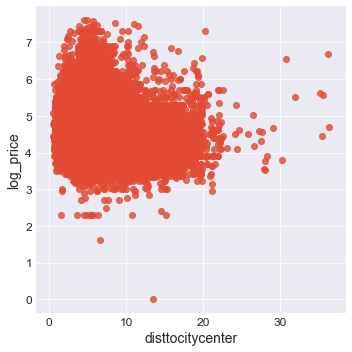

In [86]:
#Comparing distance to city center (derived variable) and log_price
sns.lmplot(x='disttocitycenter',y='log_price',fit_reg=False,data=df_prepared_imp);

No significant relationship between distance to city center and log price.

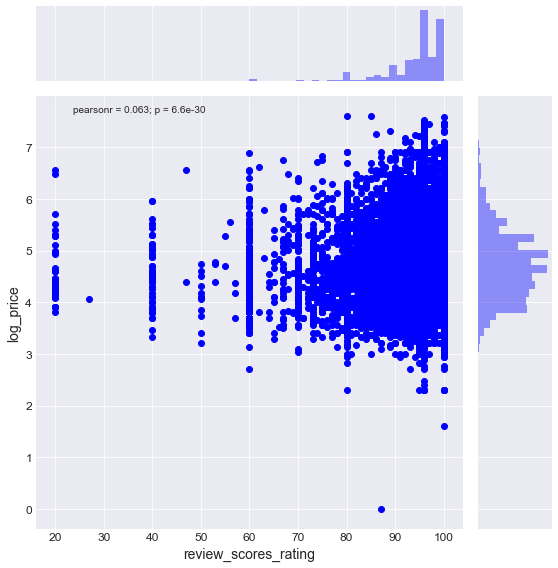

In [87]:
#Effect of review_scores w.r.t log_price
sns.jointplot(x="review_scores_rating", y="log_price", data = df_prepared_imp, color = 'blue', size = 8, linewidth = 1);

No signficant relationship showed between log price and review scores rating.

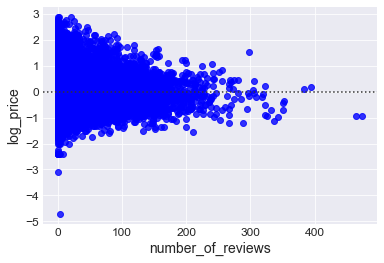

In [88]:
#number of reviews v/s log_price
sns.residplot(x="number_of_reviews", y="log_price", color='blue',data=df_prepared_imp);

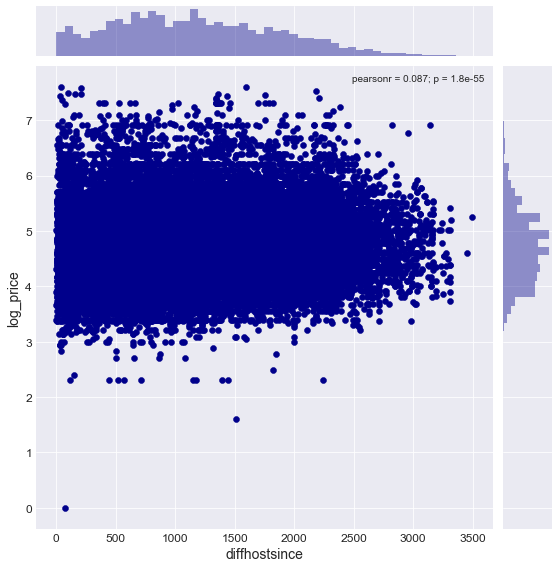

In [156]:
# review score rating vs diffhostsince
sns.jointplot(x = 'diffhostsince', y = 'log_price', data = df_prepared_imp, color = 'darkblue', 
             size = 8, ratio = 8);

In short, the attributes that we considered do not show significant impact on the price. Therefore, we will go for modeling in order to mine the patterns that influence the price.

# Modeling

## Train and test split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = df_prepared_imp.drop(['log_price'], axis = 1)
y = df_prepared_imp['log_price']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

The prepared data has been split into train and test by 70/30.

## Learning Score and Validation Curve Functions

In [100]:
# import the validation curve
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [164]:
# the function for plotting the validation curve
def vcplot(model, X, y, parameter_name, parameter_range, title):
    # this function is to plot the validation curve for regressior
    train_scores, valid_scores = validation_curve(model, X, y,
                                                  param_name = parameter_name,
                                                 param_range = parameter_range,
                                                 cv = 5, scoring = 'neg_mean_squared_error',
                                                 n_jobs = 1)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    valid_scores_mean = np.mean(valid_scores, axis = 1)
    valid_scores_std = np.std(valid_scores, axis = 1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel('{0}'.format(parameter_name))
    plt.ylabel('Score')
    plt.grid(b = True)
    #plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(parameter_range, train_scores_mean, label = 'Training score',
                color = 'darkorange', lw = lw)
    plt.fill_between(parameter_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.2,
                    color = 'darkorange', lw = lw)
    plt.semilogx(parameter_range, valid_scores_mean, label = 'Cross-validation score',
                color = 'navy', lw = lw)
    plt.fill_between(parameter_range, valid_scores_mean + valid_scores_std,
                    valid_scores_mean - valid_scores_std, alpha = 0.2,
                    color = 'navy', lw = lw)
    plt.legend(loc = 'best')
    return plt

In [171]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(b = True)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Multiple Linear Regression, Ridge regression, LASSO.

In [92]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# set up the dataframe for storing the coefficience from models
df_cof = pd.DataFrame({'att': X_train.columns.tolist()})

In [94]:
df_cof.set_index(['att'], inplace = True)

#### Multiple Linear Regression

In [95]:
# def function for calculate the mse and r2
def evaluation(prediction):
    # this function is to calculate both mse and r2
    # get the mse
    test = y_test
    mse = mean_squared_error(test, prediction)
    r2 = r2_score(test, prediction)
    return mse, r2

In [96]:
# create the lm instance
mlr = LinearRegression()
# fit the model with X_train
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
# predict the X_test
pred_mlr = mlr.predict(X_test)
#get the MSE
mse_mlr, r2_mlr = evaluation(pred_mlr)
#print the mse 
print('The test MSE of multiple linear regression is {0}'.format(mse_mlr))
print('The test R2 of multiple linear regression is {0}'.format(r2_mlr))

The test MSE of multiple linear regression is 0.18008402544699856
The test R2 of multiple linear regression is 0.5931479639769099


In [98]:
df_cof['mlm_coef'] = mlr.coef_

In [99]:
df_cof.mlm_coef.sort_values(ascending = False)[:10]

att
Tent                  0.857717
super_strict_60       0.747561
Entire home/apt       0.450511
Washer / Dryer        0.448862
Boutique hotel        0.379629
Timeshare             0.309465
Cabin                 0.280777
Serviced apartment    0.275273
Earth House           0.258997
super_strict_30       0.209656
Name: mlm_coef, dtype: float64

<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

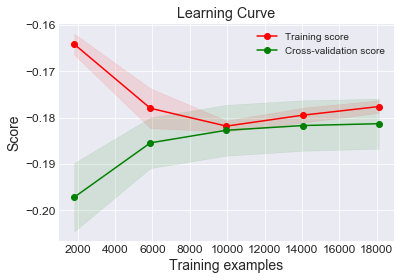

In [172]:
plot_learning_curve(mlr, 'Learning Curve', X_train, y_train, cv = 5)

The learning curve shows the multiple linear regression performed well. Overfitting occured when the training samples greater than 10000.

#### Ridge regression cv

In [103]:
alpha = np.linspace(0.1, 50)

In [104]:
# create ridge regression cv instance
reg_rdcv = RidgeCV(alphas = alpha, cv = 5)

# fit the model with X_train
reg_rdcv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1    ,  1.11837,  2.13673,  3.1551 ,  4.17347,  5.19184,
        6.2102 ,  7.22857,  8.24694,  9.26531, 10.28367, 11.30204,
       12.32041, 13.33878, 14.35714, 15.37551, 16.39388, 17.41224,
       18.43061, 19.44898, 20.46735, 21.48571, 22.50408, 23.52245,
       24.54082, 25.55918...5306,
       42.87143, 43.8898 , 44.90816, 45.92653, 46.9449 , 47.96327,
       48.98163, 50.     ]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [105]:
reg_rdcv.alpha_

16.39387755102041

In [106]:
# predict values for X_test
pred_ridcv = reg_rdcv.predict(X_test)

In [107]:
# get the mse
mse_ridcv, r2_ridcv = evaluation(pred_ridcv)
mse_ridcv, r2_ridcv

(0.1800083992434713, 0.5933188213020135)

In [108]:
df_cof['ridgecv_coef'] = reg_rdcv.coef_

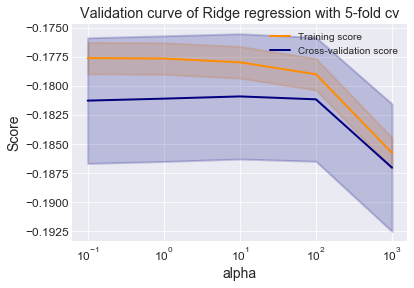

In [168]:
vcplot(Ridge(), X_train, y_train, 'alpha', [0.1, 1, 10, 100, 1000],
      title = 'Validation curve of Ridge regression with 5-fold cv');


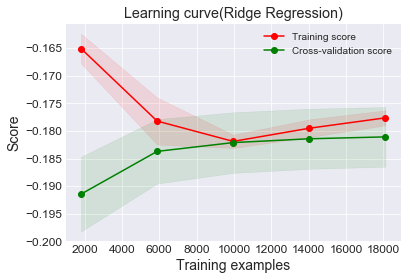

In [173]:
plot_learning_curve(Ridge(), 'Learning curve(Ridge Regression)',
                   X_train, y_train, cv = 5);

With the alpha grows up, the performence of the Ridge regression goes down. The training scores are in the range of cross validation scores, therefore, the Ridge regression performs pretty good.

In [111]:
df_cof.sort_values(by = 'ridgecv_coef', ascending = False)[:10]

,mlm_coef,ridgecv_coef
att,,
Entire home/apt,0.450511,0.447046
Timeshare,0.309465,0.225357
Indoor fireplace,0.193902,0.192368
Boutique hotel,0.379629,0.180798
Doorman,0.160926,0.158928
Dishwasher,0.148436,0.144865
Washer / Dryer,0.448862,0.144067
bathrooms,0.116708,0.115261
super_strict_30,0.209656,0.107935


#### Lasso cv

In [112]:
# create lassocv instance
reg_las = LassoCV(alphas = alpha, cv = 5, random_state = 42)

# fit the model with X_train
reg_las.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1    ,  1.11837,  2.13673,  3.1551 ,  4.17347,  5.19184,
        6.2102 ,  7.22857,  8.24694,  9.26531, 10.28367, 11.30204,
       12.32041, 13.33878, 14.35714, 15.37551, 16.39388, 17.41224,
       18.43061, 19.44898, 20.46735, 21.48571, 22.50408, 23.52245,
       24.54082, 25.55918...5306,
       42.87143, 43.8898 , 44.90816, 45.92653, 46.9449 , 47.96327,
       48.98163, 50.     ]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=False)

In [113]:
reg_las.alpha_

0.1

In [114]:
# predict the X_test
pred_las = reg_las.predict(X_test)
# get the MSE
mse_las, r2_las = evaluation(pred_las)
mse_las, r2_las

(0.250818090211676, 0.43334312734986546)

In [115]:
df_cof['lassocv_coef'] = reg_las.coef_

In [116]:
df_cof.lassocv_coef.sort_values(ascending = False)[:10]

att
Entire home/apt               0.155189
accommodates                  0.151938
review_scores_rating          0.004918
diffFirst                     0.000117
diffhostsince                 0.000043
Air conditioning              0.000000
Bathtub with shower chair     0.000000
Bathtub                       0.000000
Babysitter recommendations    0.000000
Baby monitor                  0.000000
Name: lassocv_coef, dtype: float64

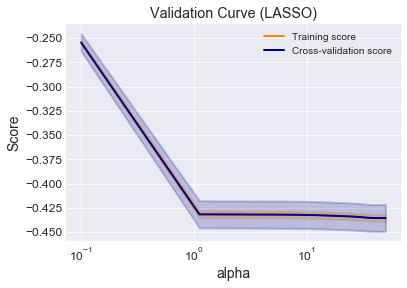

In [169]:
vcplot(Lasso(), X_train, y_train, 'alpha', alpha, 'Validation Curve (LASSO)');

The Lasso performs well. The training scores are closed with cross validation scores.

CPU times: user 1.28 s, sys: 467 ms, total: 1.75 s
Wall time: 1.91 s


<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

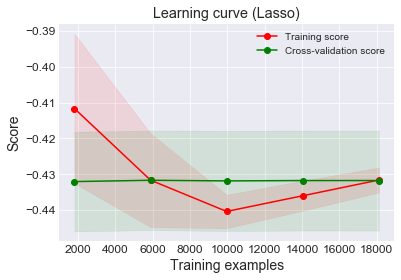

In [174]:
%time plot_learning_curve(Lasso(), 'Learning curve (Lasso)', X_train, y_train, cv = 5);

With the training size grows up, the Lasso with the training set performs better.

## ElasticsNet

In [119]:
# set up the l1_ratio
l1_ratios = np.linspace(0.1, 0.99)

In [120]:
# create the elastics net instance
reg_en = ElasticNetCV(l1_ratio = l1_ratios, alphas = alpha, cv = 5)
# fit the model
%time reg_en.fit(X_train, y_train)
# make the prediction
pred_en = reg_en.predict(X_test)
# get the mse
mse_en, r2_en = evaluation(pred_en)
mse_en, r2_en

CPU times: user 30.2 s, sys: 2.93 s, total: 33.2 s
Wall time: 26.7 s


(0.2020051699292289, 0.5436229589554253)

In [121]:
reg_en.alpha_

0.1

In [122]:
reg_en.l1_ratio_

0.1

In [123]:
df_cof['en_coef'] = reg_en.coef_

In [124]:
df_cof.en_coef.sort_values(ascending = False)[:10]

att
Entire home/apt        0.266958
accommodates           0.129186
Elevator               0.078445
TV                     0.068086
Cable TV               0.053743
Doorman                0.048474
Dryer                  0.030651
Washer                 0.021250
Family/kid friendly    0.020152
Air conditioning       0.015419
Name: en_coef, dtype: float64

<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

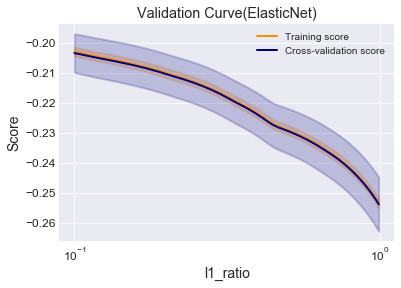

In [170]:
vcplot(ElasticNet(reg_en.alpha_), X_train, y_train, 'l1_ratio', l1_ratios, 'Validation Curve(ElasticNet)')

With the best alpha of the ElasticNet, the training set score is very close with the cross validation score, it indicates that the ElasticNet performs well with the training set.

CPU times: user 1.19 s, sys: 434 ms, total: 1.63 s
Wall time: 1.67 s


<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

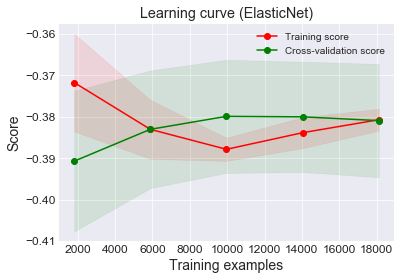

In [175]:
%time plot_learning_curve(ElasticNet(), 'Learning curve (ElasticNet)', X_train, y_train, cv = 5);

The learning curves are fluctuant of ElasticNet. However, with the size of training examples grows up, the scores of Training set and cross-validation approach to the same.

## DecisionTree Regressor and Random Forest 

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [128]:
#Regression using Decision Tree (with default parameters)
regressor_DT = DecisionTreeRegressor(random_state=42)
# set up the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                ('DecisionTreeRegressor', regressor_DT)])

In [129]:
pipe.fit(X_train,y_train)
pred_dtreg = pipe.predict(X_test)

In [130]:
# get MSE
mse_dtreg = mean_squared_error(y_test, pred_dtreg)
# get r2
r2_dtreg = r2_score(y_test, pred_dtreg)
mse_dtreg, r2_dtreg

(0.34160276315808585, 0.22823926577049403)

In [131]:
df_cof['dt_coef'] = regressor_DT.feature_importances_

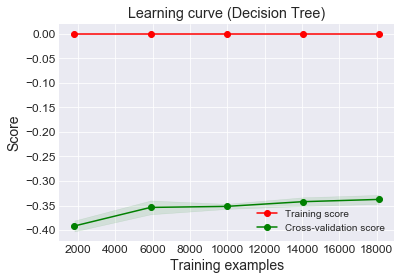

In [176]:
plot_learning_curve(regressor_DT, 'Learning curve (Decision Tree)', X_train, y_train, cv = 5);

Obviously, the overfitting is occured. The Decision Tree gets 0 MSE in this training set.

### Random Forest

In [133]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators=20,random_state=42)
regressor_RF.fit(X_train,y_train)
y_pred_RF = regressor_RF.predict(X_test)

In [134]:
mse_rf, r2_rf = evaluation(y_pred_RF)
mse_rf, r2_rf

(0.16879605987884397, 0.6186501247741423)

In [135]:
df_cof['rf_coef'] = regressor_RF.feature_importances_

<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

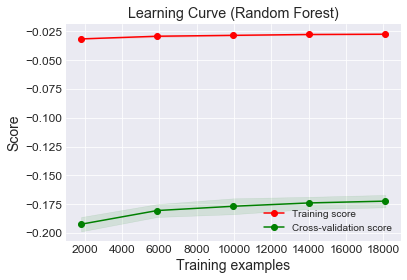

In [177]:
plot_learning_curve(regressor_RF, 'Learning Curve (Random Forest)', X_train, y_train, cv = 5)

<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

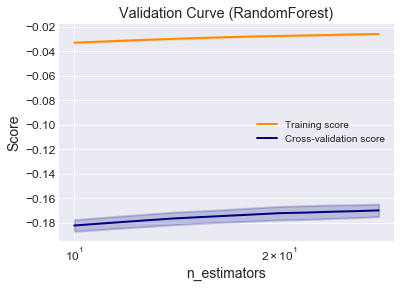

In [178]:
vcplot(RandomForestRegressor(random_state = 42), X_train, y_train, 'n_estimators', np.arange(10, 30, 2), 
      'Validation Curve (RandomForest)')

The validation curve and learning curve show the Random Forest is overfitting.

## GridsearchCV in Decision Tree

In [144]:
#Applyin Hyper-parameter tuning (GridSearchCV for Decision Tree)
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(2, 10)
}
grid_search_DT = GridSearchCV(regressor_DT, parameters, cv=5)
grid_search_DT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [145]:
print(grid_search_DT.best_score_, '\n', grid_search_DT.best_estimator_)

0.5628441448139354 
 DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')


In [146]:
pred_gs = grid_search_DT.predict(X_test)
#get mse
mse_gs, r2_gs = evaluation(pred_gs)
mse_gs, r2_gs

(0.1896572580208574, 0.5715197870504487)

CPU times: user 15min 34s, sys: 34.9 s, total: 16min 9s
Wall time: 16min 23s


<module 'matplotlib.pyplot' from '/Users/wuzirong/Documents/UMLMSBA/AdvancedDatamining/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

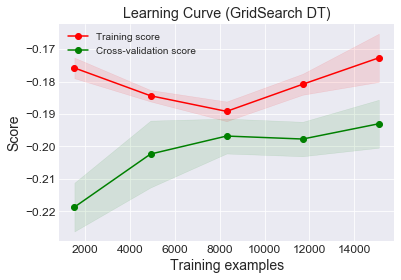

In [180]:
%time plot_learning_curve(grid_search_DT, 'Learning Curve (GridSearch DT)', X_train, y_train)

GridSearch Cross Validation of Decision Tree also occured overfitting.

## MSEs

In [147]:
df_mse = pd.DataFrame({'Models': ['multipleLinear', 'RidgeRegression', 'LASSO', 'ElasticNet', 'DecisionTree','GridSearchCV', 'Random Forest'],
                      'MSEs': [mse_mlr, mse_ridcv, mse_las, mse_en, mse_dtreg, mse_gs, mse_rf],
                      'R2': [r2_mlr, r2_ridcv, r2_las, r2_en, r2_dtreg, r2_gs, r2_rf]})

In [149]:
df_mse.set_index('Models', inplace = True)

In [148]:
df_mse

,MSEs,Models,R2
0,0.180084,multipleLinear,0.593148
1,0.180008,RidgeRegression,0.593319
2,0.250818,LASSO,0.433343
3,0.202005,ElasticNet,0.543623
4,0.341603,DecisionTree,0.228239
5,0.189657,GridSearchCV,0.571520
6,0.168796,Random Forest,0.618650


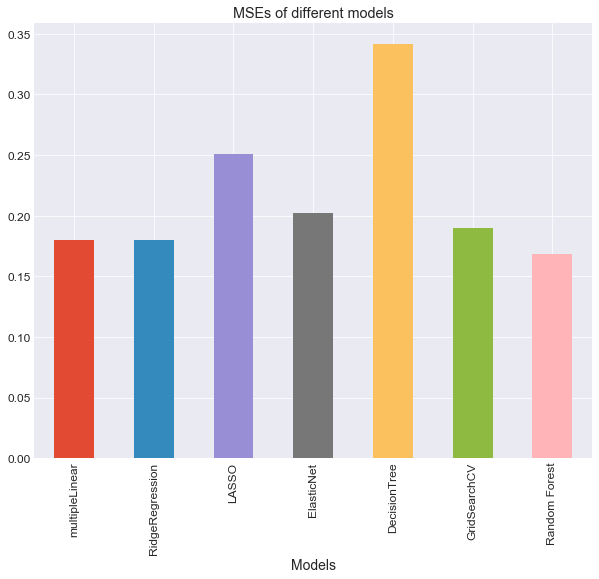

In [150]:
# create barchart
df_mse.MSEs.plot(kind = 'bar', figsize = (10, 8), title = 'MSEs of different models');

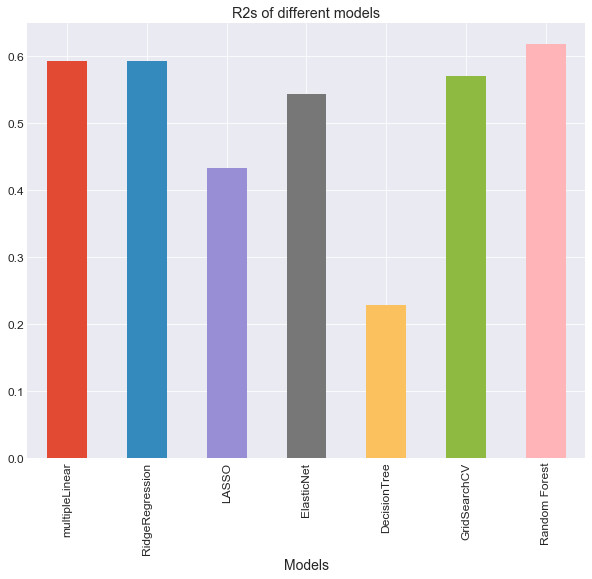

In [151]:
df_mse.R2.plot(kind = 'bar', figsize = (10, 8), title = 'R2s of different models');

In [179]:
df_cof.lassocv_coef.sort_values(ascending = False)[:5]

att
Entire home/apt         0.155189
accommodates            0.151938
review_scores_rating    0.004918
diffFirst               0.000117
diffhostsince           0.000043
Name: lassocv_coef, dtype: float64

# Summary

Since RandomForest and Decision fit are overfitting based on the validation curve. The multiple linear regression and Ridge regression will occur overfitting when the training size is huge.

Therefore, we choose the Lasso model is the best model among the six models. The MSE 0.25 and R-squares are 0.433. It means around 43.3% of the data has been explained in the LASSO.

Moreover, in the LASSO, the attributes Entire home/apt, review scores rating, accommodates,     diffhostsince, and diffFirst are the top 5 attributes of the model.

Overall, most of the airbnb price were set up according to whether they are offering the entire home/apt, review scores rating, the time that they got the first review, accommodates and the length of hosting. In another words, if you want to find a low price airbnb, you'd better lower your requirement about the space and the review rating.